In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalize Confusion Matrix')
  else:
    print('Unnormalize Confusion Matrix')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

In [2]:
(fmnist_x_train, fmnist_y_train), (fmnist_x_test, fmnist_y_test) = tf.keras.datasets.fashion_mnist.load_data()
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(fmnist_x_train.shape, fmnist_x_test.shape, cifar_x_train.shape,  cifar_x_test.shape)

(60000, 28, 28) (10000, 28, 28) (50000, 32, 32, 3) (10000, 32, 32, 3)


## CNN using functional API

### Fashion MNIST

In [4]:
k = len(set(fmnist_y_train))
print(k)
fmnist_x_train, fmnist_x_test = fmnist_x_train/255.0, fmnist_x_test/255.0

10


In [5]:
#Changing the matrix into a 3D tensor, to be put in the cov2d: 

fmnist_x_train = np.expand_dims(fmnist_x_train, -1)
fmnist_x_test = np.expand_dims(fmnist_x_test, -1)

In [6]:
#Build Model using functional API
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

i = Input(shape=fmnist_x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model_f = Model(i,x)

In [7]:
model_f.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model_f.fit(fmnist_x_train, fmnist_y_train, validation_data=(fmnist_x_test, fmnist_y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5172 - accuracy: 0.8090 - val_loss: 0.3866 - val_accuracy: 0.8533
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8670 - val_loss: 0.3618 - val_accuracy: 0.8634
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8827 - val_loss: 0.3321 - val_accuracy: 0.8735
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2760 - accuracy: 0.8967 - val_loss: 0.3136 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9062 - val_loss: 0.3063 - val_accuracy: 0.8869
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2298 - accuracy: 0.9123 - val_loss: 0.3010 - val_accuracy: 0.8934
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2108 - accuracy: 0.9201 - val_loss: 0.3048 - val_accuracy:

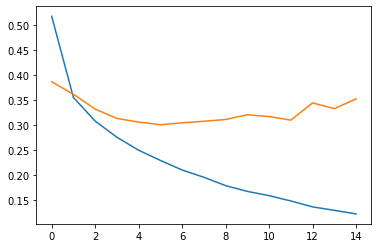

In [8]:
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.show()

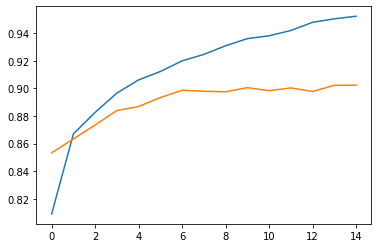

In [9]:
plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.show()

Unnormalize Confusion Matrix
[[870   1  17  25   3   1  76   0   7   0]
 [  1 976   2  13   2   0   3   0   3   0]
 [ 17   0 844  10  56   0  73   0   0   0]
 [ 13   6  13 912  24   0  30   1   1   0]
 [  2   1  37  20 852   0  87   0   1   0]
 [  0   0   0   1   0 972   1  21   0   5]
 [124   0  57  20  80   0 706   0  13   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  1   0   2   1   3   1  14   3 974   1]
 [  1   0   0   0   0   4   0  61   1 933]]


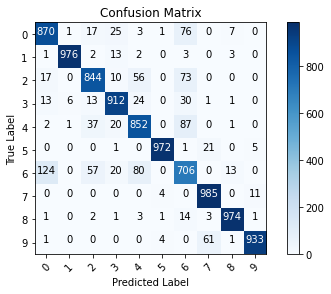

In [10]:
f_pred = model_f.predict(fmnist_x_test).argmax(axis=1)
f_cm = confusion_matrix(fmnist_y_test, f_pred)
plot_confusion_matrix(f_cm, list(range(10)))

### CIFAR 10 

In [11]:
cifar_x_train, cifar_x_test = cifar_x_train/255.0, cifar_x_test/255.0
cifar_y_train, cifar_y_test = cifar_y_train.flatten(), cifar_y_test.flatten()
kc = len(set(cifar_y_train))
print(kc)

10


In [18]:
c_i = Input(shape=cifar_x_train[0].shape)
c_x = Conv2D(32, (3,3), strides = 2, activation='relu')(c_i)
c_x = Conv2D(64, (3,3), strides = 2, activation='relu')(c_x)
c_x = Conv2D(128, (3,3), strides = 2, activation='relu')(c_x)
c_x = Flatten()(c_x)
c_x = Dropout(0.35)(c_x)
c_x = Dense(1024, activation = 'relu')(c_x)
c_x = Dropout(0.2)(c_x)
c_x = Dense(kc, activation='softmax')(c_x)

model_c = Model(c_i,c_x)

In [19]:
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
c_result = model_c.fit(cifar_x_train, cifar_y_train, validation_data=(cifar_x_test, cifar_y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5277 - accuracy: 0.4432 - val_loss: 1.2751 - val_accuracy: 0.5414
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2143 - accuracy: 0.5620 - val_loss: 1.1156 - val_accuracy: 0.6001
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0733 - accuracy: 0.6163 - val_loss: 1.0117 - val_accuracy: 0.6432
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9655 - accuracy: 0.6557 - val_loss: 0.9262 - val_accuracy: 0.6731
Epoch 5/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8811 - accuracy: 0.6862 - val_loss: 0.9089 - val_accuracy: 0.6795
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7999 - accuracy: 0.7142 - val_loss: 0.8910 - val_accuracy: 0.6881
Epoch 7/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7409 - accuracy: 0.7369 - val_loss: 0.8348 - val_accuracy:

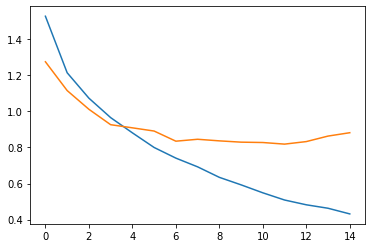

In [20]:
plt.plot(c_result.history['loss'], label='Loss')
plt.plot(c_result.history['val_loss'], label='Validation Loss')
plt.show()

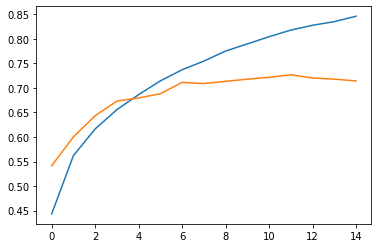

In [21]:
plt.plot(c_result.history['accuracy'], label='Accuracy')
plt.plot(c_result.history['val_accuracy'], label='Validation Accuracy')
plt.show()

Unnormalize Confusion Matrix
[[680  21  48  37  30  18  14  16  70  66]
 [  9 796   6  11   4   4  17   6  19 128]
 [ 37   4 516  58 139 107  87  24  17  11]
 [  6   4  36 474  73 255  87  40   9  16]
 [  9   2  39  51 721  47  49  72  10   0]
 [  2   2  29 132  49 690  33  52   6   5]
 [  2   2  16  37  40  49 838  10   3   3]
 [  1   1  20  36  62  79   9 775   4  13]
 [ 45  30  11  12   9  20  20   3 819  31]
 [ 10  54   8  23   7  14  13  17  21 833]]


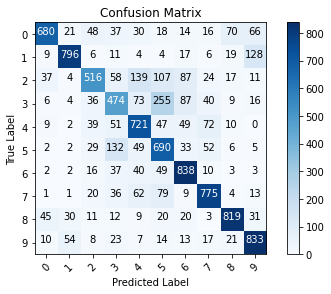

In [22]:
c_pred = model_c.predict(cifar_x_test).argmax(axis=1)
c_cm = confusion_matrix(cifar_y_test, c_pred)
plot_confusion_matrix(c_cm, list(range(10)))

## Data Augmentation

### CIFAR 10

In [24]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [26]:
(cif_x_train, cif_y_train), (cif_x_test, cif_y_test) = tf.keras.datasets.cifar10.load_data()
cif_x_train, cif_x_test = cif_x_train/255.0, cif_x_test/255.0
cif_y_train, cif_y_test = cif_y_train.flatten(), cif_y_test.flatten()
k2 = len(set(cif_y_train))

In [29]:
cf_i = Input(shape=cif_x_train[0].shape)
cf_x = Conv2D(32, (3,3), activation='relu', padding='same')(cf_i)
cf_x = BatchNormalization()(cf_x)
cf_x = Conv2D(32, (3,3), activation='relu', padding='same')(cf_x)
cf_x = BatchNormalization()(cf_x)
cf_x = MaxPooling2D((2,2))(cf_x)
#cf_x = Dropout(0.2)(cf_x)
cf_x = Conv2D(64, (3,3), activation='relu', padding='same')(cf_x)
cf_x = BatchNormalization()(cf_x)
cf_x = Conv2D(64, (3,3), activation='relu', padding='same')(cf_x)
cf_x = BatchNormalization()(cf_x)
cf_x = MaxPooling2D((2,2))(cf_x)
#cf_x = Dropout(0.2)(cf_x)
cf_x = Conv2D(128, (3,3), activation='relu', padding='same')(cf_x)
cf_x = BatchNormalization()(cf_x)
cf_x = Conv2D(128, (3,3), activation='relu', padding='same')(cf_x)
cf_x = BatchNormalization()(cf_x)
cf_x = MaxPooling2D((2,2))(cf_x)
#cf_x = Dropout(0.2)(cf_x)
cf_x = Flatten()(cf_x)
cf_x = Dropout(0.2)(cf_x)
cf_x = Dense(1024, activation='relu')(cf_x)
cf_x = Dropout(0.2)(cf_x)
cf_x = Dense(k2, activation='softmax')(cf_x)
model_cf = Model(cf_i, cf_x)

model_cf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
#Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(cif_x_train, cif_y_train, batch_size)
steps_per_epoch = cif_x_train.shape[0] // batch_size
results_cif = model_cf.fit(train_generator, validation_data=(cif_x_test, cif_y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

Epoch 1/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4429 - accuracy: 0.4997 - val_loss: 1.1275 - val_accuracy: 0.6057
Epoch 2/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0080 - accuracy: 0.6495 - val_loss: 0.8605 - val_accuracy: 0.7063
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.8521 - accuracy: 0.7064 - val_loss: 0.9636 - val_accuracy: 0.6927
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7604 - accuracy: 0.7399 - val_loss: 0.7389 - val_accuracy: 0.7508
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7003 - accuracy: 0.7631 - val_loss: 0.7224 - val_accuracy: 0.7561
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.6447 - accuracy: 0.7824 - val_loss: 0.7309 - val_accuracy: 0.7648
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.6005 - accuracy: 0.7963 - val_loss: 0.6660 -

In [33]:
model_cf.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        1849

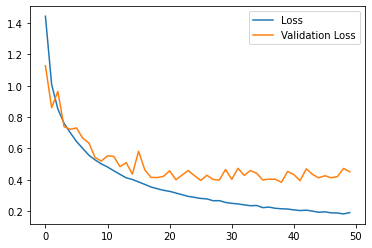

In [34]:
plt.plot(results_cif.history['loss'], label='Loss')
plt.plot(results_cif.history['val_loss'], label='Validation Loss')
plt.legend()

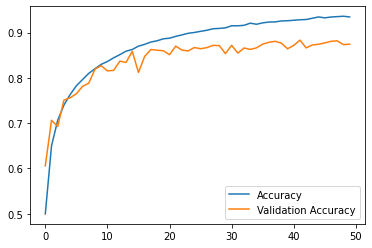

In [35]:
plt.plot(results_cif.history['accuracy'], label='Accuracy')
plt.plot(results_cif.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Unnormalize Confusion Matrix
[[887  11  21  10   1   0  17   2  28  23]
 [  3 950   0   1   1   1   1   0   6  37]
 [ 30   1 785  24  31  26  90   7   3   3]
 [  9   3  25 754  17  69  92  11   5  15]
 [  6   2  17  34 833  18  73  12   2   3]
 [  3   4  18  89  17 796  49  16   0   8]
 [  3   1   8  11   2   1 971   0   1   2]
 [  7   1   9  20  22  17  18 896   2   8]
 [ 28  15   2   3   0   0  10   1 920  21]
 [  6  34   0   2   1   0   3   2   3 949]]


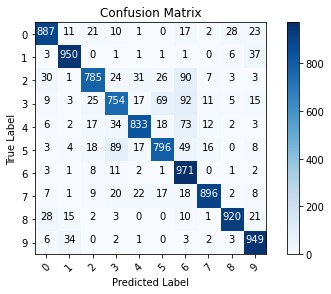

In [38]:
from sklearn.metrics import confusion_matrix
pred_cf = model_cf.predict(cif_x_test).argmax(axis = 1)
cf_cm = confusion_matrix(cif_y_test, pred_cf)
plot_confusion_matrix(cf_cm, list(range(10)))